<a href="https://colab.research.google.com/github/saubhagya-sharma/voiceGender_prediction/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minor Project
# Gender Prediction with Accoustic data


> By: Saubhagya Sharma



---



---



In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv('voice.csv')
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

**1)Remove/handle null values (if any)**

In [3]:
print(data.isnull().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


In [4]:
# therefore, there are no null values

**2)Depict percentage distribution of label on a pie chart**

In [5]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [6]:
print(data['label'].value_counts()['male'])
print(data['label'].value_counts()['female'])

1584
1584


In [7]:
num=[1584,1584]
labels=['male','female']

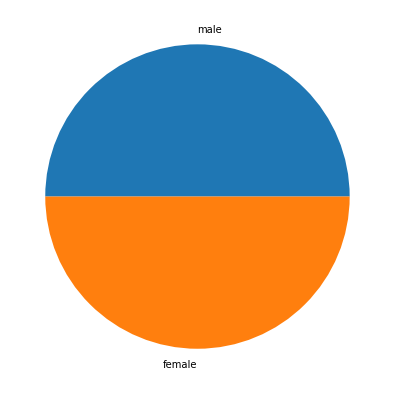

In [8]:
#genders=['male','female']
fig = plt.figure(figsize =(10, 7))
plt.pie(num, labels=labels)
plt.show()

In [9]:
# The above figure shows that the data set has equal number of male and female voices

**3)Considering all the features as independent feature and label as dependent feature,
split the dataset training and testing data with test size=20%**

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**4)Apply the following classifier models on training dataset and generate predictions for
the test dataset**

**a. Decision Tree Classifier**

In [11]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_dtc = dtc.predict(x_test)
print(accuracy_score(y_test, y_dtc))

0.9526813880126183


The accuracy of this model is 95%. This shows that the model effectively recognizes female and male voices.

In [12]:
#confusion matrix
print(confusion_matrix(y_test, y_dtc))

[[286  15]
 [ 15 318]]


**b. Random Forest Classifier**

In [13]:
rf = ensemble.RandomForestClassifier()
rf.fit(x_train, y_train)
y_rf = rf.predict(x_test)

print(accuracy_score(y_test, y_rf))

0.9794952681388013


This model is the one with the highest accuracy of 98%

In [14]:
#confusion matrix
print(confusion_matrix(y_test, y_rf))

[[293   8]
 [  5 328]]


**c. KNN Classifier**

In [34]:
knc = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 3)
knc.fit(x_train, y_train)
y_knc = knc.predict(x_test)

print(accuracy_score(y_test, y_knc))

0.7129337539432177


This model has a very low accuracy of 71%.

In [35]:
#confusion matrix
print(confusion_matrix(y_test, y_knc))

[[203  98]
 [ 84 249]]


**d. Logistic Regression**

In [20]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)
y_lr = lr.predict(x_test)

lr_score = accuracy_score(y_test, y_lr)
print(lr_score)

0.9148264984227129


The accuracy of this model is 91% which is a good score but it can probably be improved.

In [21]:
#confusion matrix
print(confusion_matrix(y_test, y_lr))

[[257  44]
 [ 10 323]]


**e. SVM Classifier**

In [16]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
y_classifier = classifier.predict(x_test)

print(accuracy_score(y_test, y_classifier))

0.9274447949526814


The accuracy of this model is 92%. This can be better.

In [19]:
#confusion matrix
print(confusion_matrix(y_test, y_classifier))

[[260  41]
 [  5 328]]


From the above code we draw the conclusion that some models work really good for predicting gender on our data set while others not so good.

Random forest classifier works amazingly with 98% accuracy.

whereas, K Nearest Neighbour Model works with only 71% accuracy.

**Therefore, it is safe to say that *Random Forest Classifier* is the best suited model for the problem statement**